In [2]:
!pip install numpy
!pip install pandas

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
file = 'football.csv'
df= pd.read_csv(file)
df.columns

Index(['sofifa_id', 'short_name', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_jersey_number',
       'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentalit

**Predict the “Overall” (target attribute: “overall”) rating of the players using Linear
regression**

In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, prefix_sep='_')
df['goalkeeping_speed'].fillna(0, inplace=True)
df.columns
df.dtypes

sofifa_id                                                             int64
overall                                                               int64
potential                                                             int64
value_eur                                                           float64
wage_eur                                                            float64
                                                                     ...   
player_traits_Team Player, Rushes Out Of Goal                         uint8
player_traits_Team Player, Rushes Out Of Goal, Comes For Crosses      uint8
player_traits_Team Player, Saves with Feet                            uint8
player_traits_Team Player, Technical Dribbler (AI)                    uint8
player_traits_Technical Dribbler (AI)                                 uint8
Length: 9255, dtype: object

In [6]:
X=df.drop(['overall'], axis=1)
y=df['overall']
df

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,player_traits_Team Player,"player_traits_Team Player, Cautious With Crosses","player_traits_Team Player, Cautious With Crosses, Saves with Feet","player_traits_Team Player, Comes For Crosses","player_traits_Team Player, Comes For Crosses, Saves with Feet","player_traits_Team Player, Rushes Out Of Goal","player_traits_Team Player, Rushes Out Of Goal, Comes For Crosses","player_traits_Team Player, Saves with Feet","player_traits_Team Player, Technical Dribbler (AI)",player_traits_Technical Dribbler (AI)
0,158023,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,188545,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,20801,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,190871,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,192985,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,260174,51,64,140000.0,500.0,20,174,70,111629.0,1.0,...,0,0,0,0,0,0,0,0,0,0
7768,232286,50,53,60000.0,500.0,25,179,70,1586.0,1.0,...,0,0,0,0,0,0,0,0,0,0
7769,253657,50,60,100000.0,1000.0,21,175,65,111774.0,1.0,...,0,0,0,0,0,0,0,0,0,0
7770,258964,49,55,70000.0,2000.0,22,184,77,112429.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model=LinearRegression()
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
model.fit(X_train_imputed, y_train)

LinearRegression()

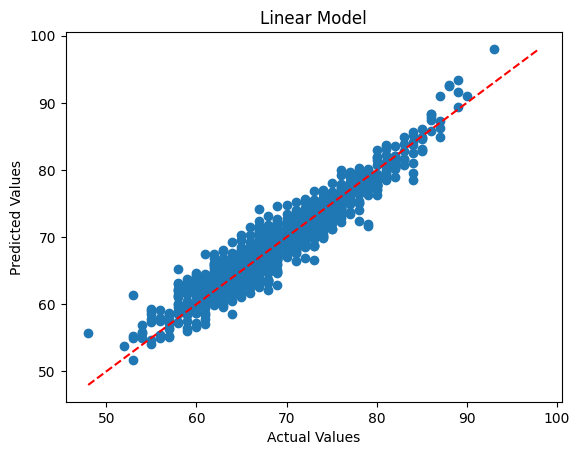

In [9]:
X_test_imputed = imputer.fit_transform(X_test)
y_pred=model.predict(X_test_imputed)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Model')
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], 'r--', label='Perfect Fit')
plt.show()

**report the Mean Absolute Error(MAE), Mean Square Error(MSE), R2 score**

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Rsquared score:', r2)

Mean Squared Error (MSE): 3.6815833034594196
Mean Absolute Error (MAE): 1.4867146543946679
Rsquared score: 0.9020731143210389


**Compare the performance of linear regression, Ridge regression, and Lasso regression
models.**

In [11]:
from sklearn.linear_model import Ridge, Lasso
ridge_model= Ridge(alpha=1.0)
ridge_model.fit(X_train_imputed, y_train)
lasso_model= Lasso(alpha=1.0)
lasso_model.fit(X_train_imputed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Lasso()

In [12]:
y_pred_ridge = ridge_model.predict(X_test_imputed)
y_pred_lasso = lasso_model.predict(X_test_imputed)

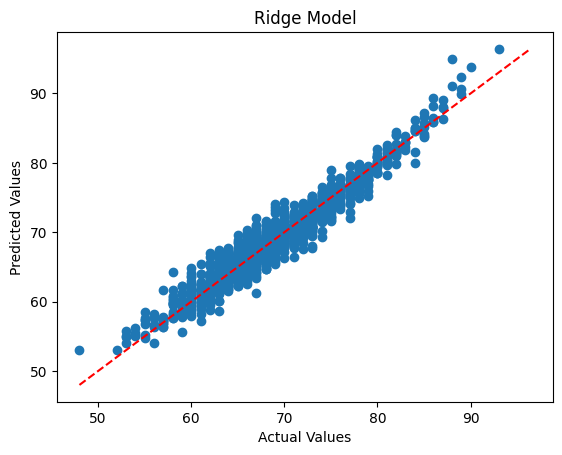

In [13]:
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Model')
max_value = max(max(y_test), max(y_pred_ridge))
min_value = min(min(y_test), min(y_pred_ridge))
plt.plot([min_value, max_value], [min_value, max_value], 'r--', label='Perfect Fit')
plt.show()

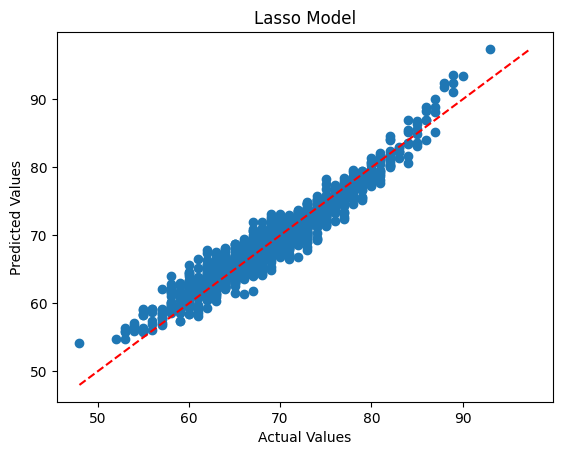

In [14]:
plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Model')
max_value = max(max(y_test), max(y_pred_lasso))
min_value = min(min(y_test), min(y_pred_lasso))
plt.plot([min_value, max_value], [min_value, max_value], 'r--', label='Perfect Fit')
plt.show()

In [16]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge= r2_score(y_test, y_pred_ridge)

print('Mean Squared Error (MSE):', mse_ridge)
print('Mean Absolute Error (MAE):', mae_ridge)
print('Rsquared score:', r2_ridge)

Mean Squared Error (MSE): 2.3944777613920967
Mean Absolute Error (MAE): 1.1787826206597192
Rsquared score: 0.9363089924434618


In [17]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso= r2_score(y_test, y_pred_lasso)

print('Mean Squared Error (MSE):', mse_lasso)
print('Mean Absolute Error (MAE):', mae_lasso)
print('Rsquared score:', r2_lasso)

Mean Squared Error (MSE): 2.8213334543396504
Mean Absolute Error (MAE): 1.2957767175205739
Rsquared score: 0.9249550055309803


(0.0, 5.52237495518913)

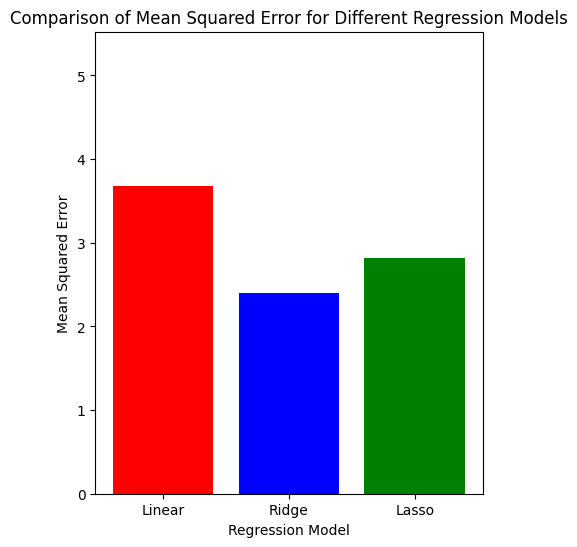

In [18]:
mse_values = [mse, mse_ridge, mse_lasso]
model_names = ['Linear', 'Ridge', 'Lasso']
plt.figure(figsize=(5, 6))
plt.bar(model_names, mse_values, color=['red', 'blue', 'green'])
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Different Regression Models')
plt.ylim(0, max(mse_values) * 1.5)

(0.0, 5.52237495518913)

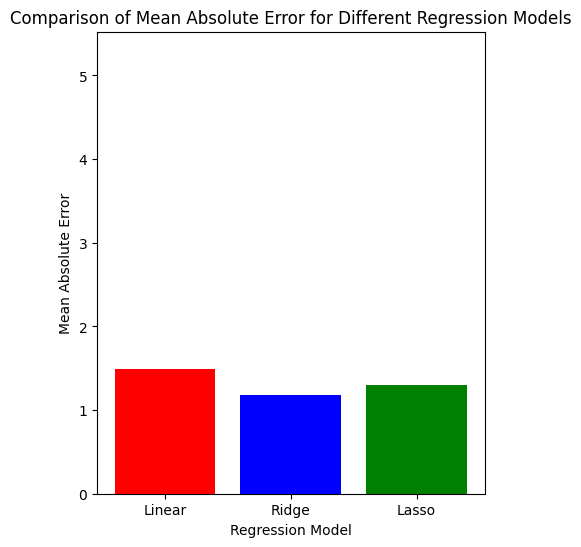

In [19]:
mae_values = [mae, mae_ridge, mae_lasso]
plt.figure(figsize=(5, 6))
plt.bar(model_names, mae_values, color=['red', 'blue', 'green'])
plt.xlabel('Regression Model')
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Mean Absolute Error for Different Regression Models')
plt.ylim(0, max(mse_values) * 1.5)

(0.0, 5.52237495518913)

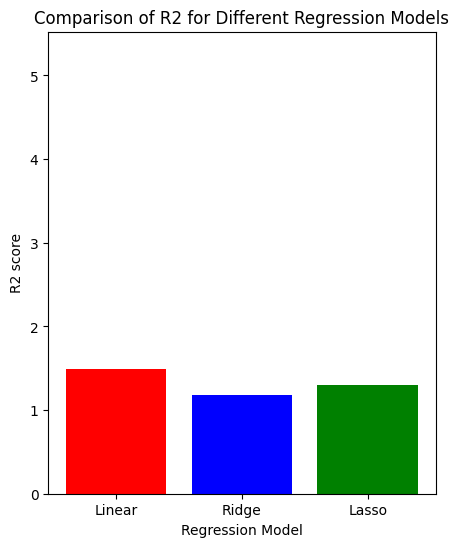

In [20]:
r2_values = [r2, r2_ridge, r2_lasso]
plt.figure(figsize=(5, 6))
plt.bar(model_names, mae_values, color=['red', 'blue', 'green'])
plt.xlabel('Regression Model')
plt.ylabel('R2 score')
plt.title('Comparison of R2 for Different Regression Models')
plt.ylim(0, max(mse_values) * 1.5)

**Perform the hyperparameters tuning and observe how they affect the model’s
bias-variance trade-off**


In [21]:
from sklearn.linear_model import Lasso
alpha_values= [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
bias_array = []
variance_array= []
coefficients= []
mse_array= []
for i in  alpha_values:
    lassomodel=Lasso(alpha=i)
    lassomodel.fit(X_train_imputed, y_train)
    coefficients.append(lassomodel.coef_)
    y_predvalue=lassomodel.predict(X_test_imputed)
    mse = mean_squared_error(y_test, y_predvalue)
    mse_array.append(mse)
    bias= (np.mean((y_predvalue) - (y_test)))
    bias_array.append(bias)
    variance = np.var(y_predvalue)
    variance_array.append(variance)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.887e+03, tolerance: 2.167e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.695e+03, tolerance: 2.167e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.094e+03, tolerance: 2.167e

In [22]:
bias_array


[0.05003924598242209,
 0.042109478160923794,
 0.030174365363633524,
 0.031852652988764,
 0.09465788542077669,
 0.1314376530798335,
 0.12746891802252397]

In [23]:
np.log10(variance_array)


array([1.54906321, 1.54816313, 1.54463902, 1.51281633, 1.35178456,
       1.31716764, 1.30938304])

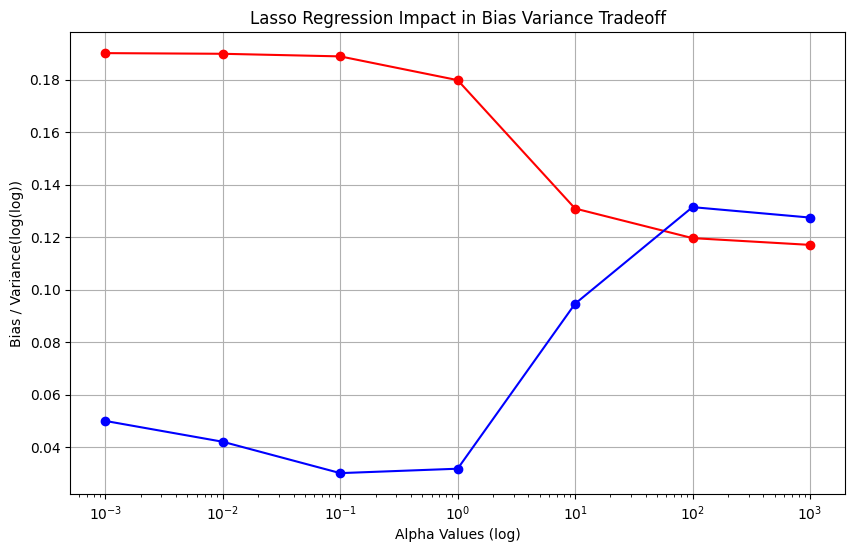

In [30]:
plt.figure(figsize=(10,6))
plt.plot(alpha_values, np.log10(np.log10(variance_array)), label="VARIANCE", color="red", marker = 'o')
plt.plot(alpha_values, bias_array, label="BIAS", color="blue", marker = 'o')
#plt.plot(alpha_values, mse_array, label="MSE", color="green")
plt.xscale('log')
plt.xlabel("Alpha Values (log)")
plt.ylabel("Bias / Variance(log(log))")
plt.title("Lasso Regression Impact in Bias Variance Tradeoff")
plt.grid()
plt.show()

**Investigate the impact of the Lasso regularisation parameter on
this feature selection process.**

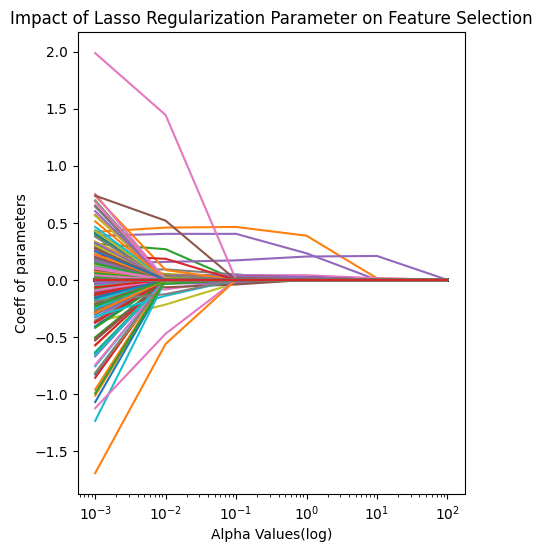

In [ ]:
plt.figure(figsize=(5,6))
plt.plot(alpha_values, coefficients)
plt.xscale('log')
plt.xlabel("Alpha Values(log)")
plt.ylabel("Coeff of parameters")
plt.title('Impact of Lasso Regularization Parameter on Feature Selection')
plt.show()